In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\indum\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.1708 - loss: 2.2172 - val_accuracy: 0.2792 - val_loss: 2.0251
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.2872 - loss: 1.9982 - val_accuracy: 0.3110 - val_loss: 1.9454
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.3225 - loss: 1.9047 - val_accuracy: 0.3294 - val_loss: 1.8649
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.3491 - loss: 1.8347 - val_accuracy: 0.3458 - val_loss: 1.8154
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.3635 - loss: 1.7832 - val_accuracy: 0.3574 - val_loss: 1.7997
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.3747 - loss: 1.7441 - val_accuracy: 0.3822 - val_loss: 1.7347
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.3902 - loss: 1.7182 - val_accuracy: 0.3958 - val_loss: 1.7218
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.4044 - loss: 1.6880 - 

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\n🔹 Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4355 - loss: 1.6130

🔹 Test Accuracy: 0.4319


In [14]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


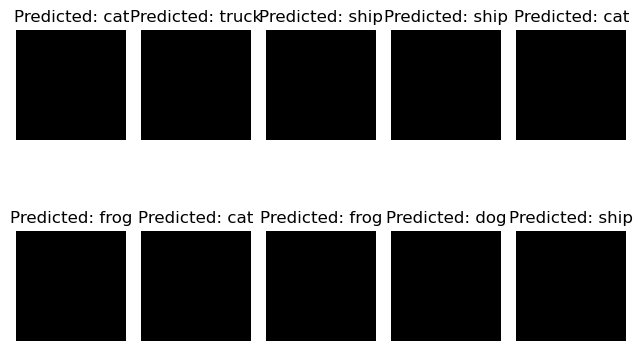

In [15]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_names[y_pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()